# Socioeconomic Indicators Clustering

https://www.kaggle.com/datasets/ashydv/country-socioeconomic-data  

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./data/countries.csv", encoding="utf-8")

In [3]:
df.shape

(167, 15)

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region_1,region_2,continent,latitude,longitude
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Southern Asia,NaN,Asia,33.939110,67.709953
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Southern Europe,NaN,Europe,41.153332,20.168331
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Northern Africa,NaN,Africa,28.033886,1.659626
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Middle Africa,Sub-Saharan Africa,Africa,-11.202692,17.873887
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Caribbean,Latin America and the Caribbean,North America,17.060816,-61.796428


In [5]:
print(df["country"].nunique() == df["country"].count())

True


In [6]:
df = df.set_index("country")

In [7]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,region_1,region_2,continent,latitude,longitude
country,,,,,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0,Southern Asia,NaN,Asia,33.939110,67.709953
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0,Southern Europe,NaN,Europe,41.153332,20.168331
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0,Northern Africa,NaN,Africa,28.033886,1.659626
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0,Middle Africa,Sub-Saharan Africa,Africa,-11.202692,17.873887
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0,Caribbean,Latin America and the Caribbean,North America,17.060816,-61.796428


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167 entries, Afghanistan to Zambia
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    float64
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    float64
 9   region_1    167 non-null    object 
 10  region_2    66 non-null     object 
 11  continent   167 non-null    object 
 12  latitude    167 non-null    float64
 13  longitude   167 non-null    float64
dtypes: float64(11), object(3)
memory usage: 19.6+ KB


In [9]:
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,latitude,longitude
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689,19.485289,19.474636
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809,24.637862,63.885621
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000,-40.900557,-175.198242
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000,4.064895,-6.319850
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,18.109581,20.939444
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000,40.303386,49.577080
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,64.963051,179.414413


In [10]:
df.isnull().sum()

child_mort      0
exports         0
health          0
imports         0
income          0
inflation       0
life_expec      0
total_fer       0
gdpp            0
region_1        0
region_2      101
continent       0
latitude        0
longitude       0
dtype: int64

In [11]:
df["region_2"].dropna().unique()

array(['Sub-Saharan Africa', 'Latin America and the Caribbean'],
      dtype=object)

In [12]:
df["region_2"].fillna("Unknown", inplace=True)

C:\Users\minni\AppData\Local\Temp\ipykernel_123780\2369550774.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["region_2"].fillna("Unknown", inplace=True)


In [13]:
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
region_1      0
region_2      0
continent     0
latitude      0
longitude     0
dtype: int64

In [14]:
sns.set(style="darkgrid")

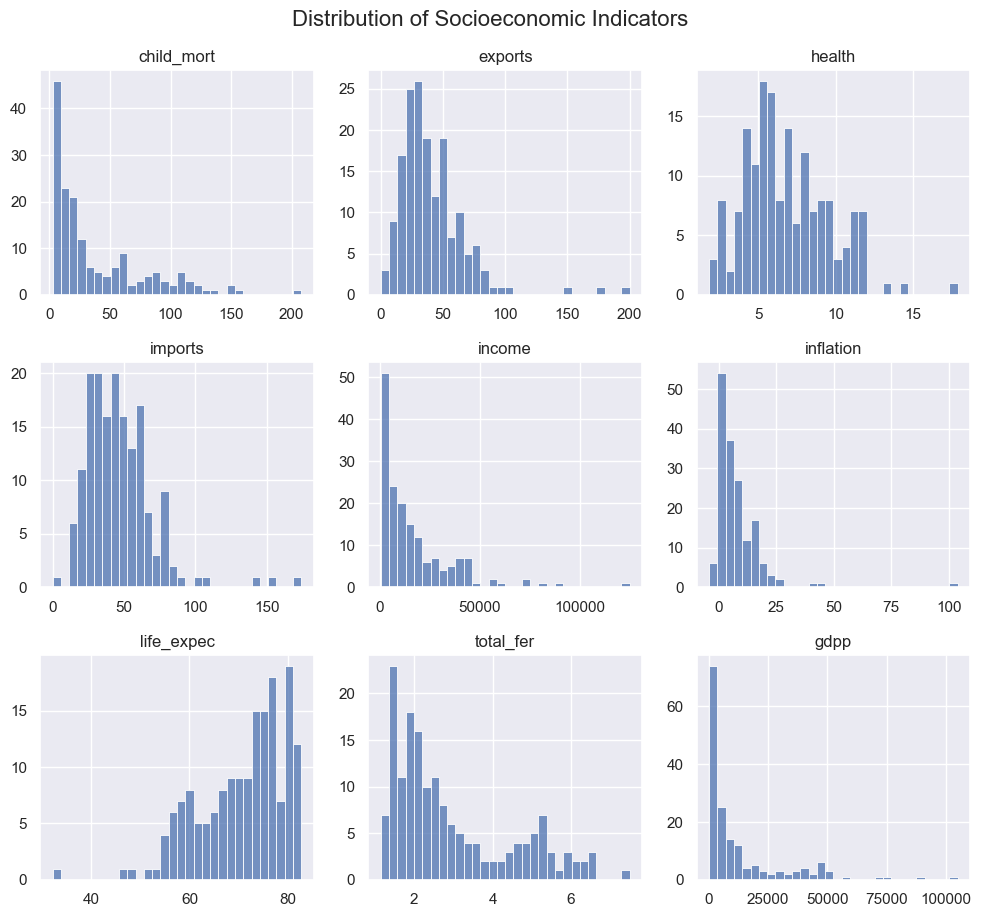

In [15]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))

sns.histplot(df["child_mort"], ax=axes[0, 0], bins=30).set(title="child_mort")
sns.histplot(df["exports"], ax=axes[0, 1], bins=30).set(title="exports")
sns.histplot(df["health"], ax=axes[0, 2], bins=30).set(title="health")
sns.histplot(df["imports"], ax=axes[1, 0], bins=30).set(title="imports")
sns.histplot(df["income"], ax=axes[1, 1], bins=30).set(title="income")
sns.histplot(df["inflation"], ax=axes[1, 2], bins=30).set(title="inflation")
sns.histplot(df["life_expec"], ax=axes[2, 0], bins=30).set(title="life_expec")
sns.histplot(df["total_fer"], ax=axes[2, 1], bins=30).set(title="total_fer")
sns.histplot(df["gdpp"], ax=axes[2, 2], bins=30).set(title="gdpp")

for ax in axes.flat:
    ax.set_xlabel("")
    ax.set_ylabel("")

plt.suptitle("Distribution of Socioeconomic Indicators", fontsize=16)
plt.subplots_adjust(top=0.92, wspace=0.2, hspace=0.3)

plt.savefig("./result/columns_hist.png", bbox_inches="tight")

In [16]:
heatmap_df = df.drop(columns=["region_1", "region_2", "continent", "latitude", "longitude"])

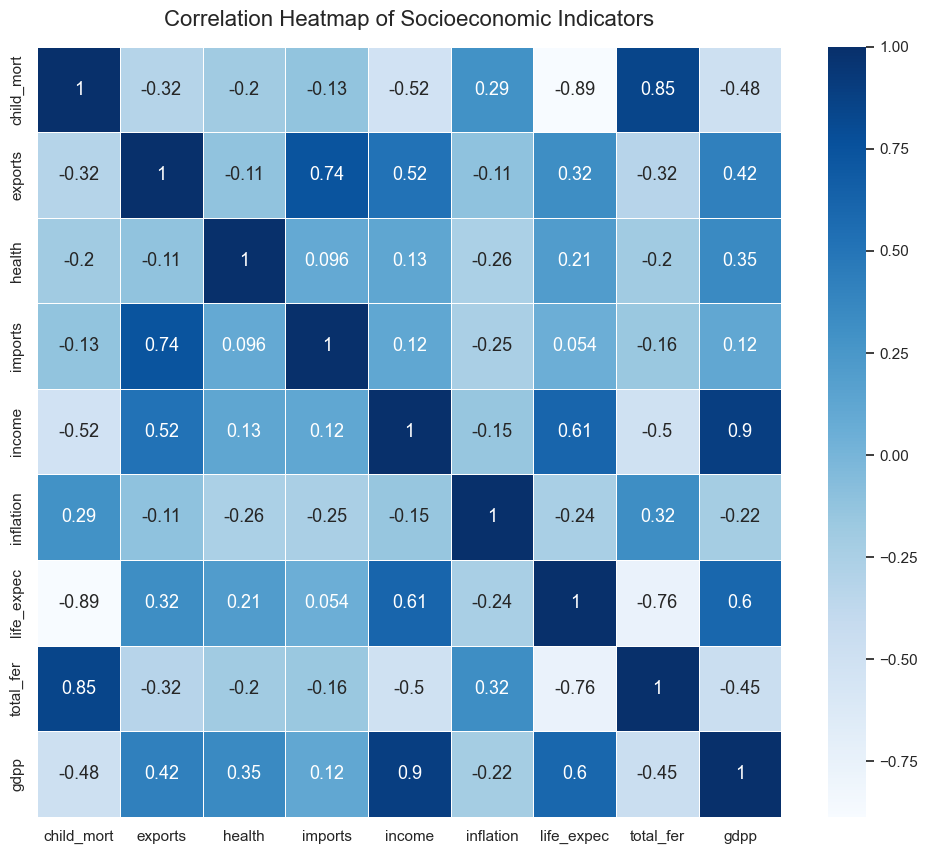

In [17]:
plt.figure(figsize=(12, 10))

sns.heatmap(heatmap_df.corr(), annot=True, cmap="Blues", linewidths=.5, annot_kws={"size": 13})
plt.title("Correlation Heatmap of Socioeconomic Indicators", fontsize=16, pad=15)

plt.savefig("./result/columns_heat.png", bbox_inches="tight")

In [18]:
continent_df = df.drop(columns=["region_1", "region_2", "latitude", "longitude"])
continent_df = continent_df.groupby("continent").mean()

In [19]:
continent_df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
continent,,,,,,,,,
Africa,82.155319,33.972553,6.014894,43.938298,5627.510638,10.730553,61.504255,4.671277,2644.617021
Asia,29.773333,44.361978,5.183111,44.425909,20924.444444,10.522711,72.651111,2.594667,11731.444444
Europe,6.184615,53.858974,8.930000,55.394872,29930.256410,2.803590,77.497436,1.599744,28534.102564
North America,30.020000,33.040000,7.821333,47.040000,15960.666667,3.277867,72.440000,2.309333,13522.133333
Oceania,25.711111,31.355556,8.281111,57.888889,11247.777778,3.252222,68.933333,3.340000,11651.111111
South America,22.258333,32.825000,6.846667,31.616667,12429.166667,11.160833,74.450000,2.409167,7690.000000


In [20]:
continent_df = continent_df.reset_index(drop=False)

In [21]:
palette = sns.color_palette("pastel")
colors = palette.as_hex()

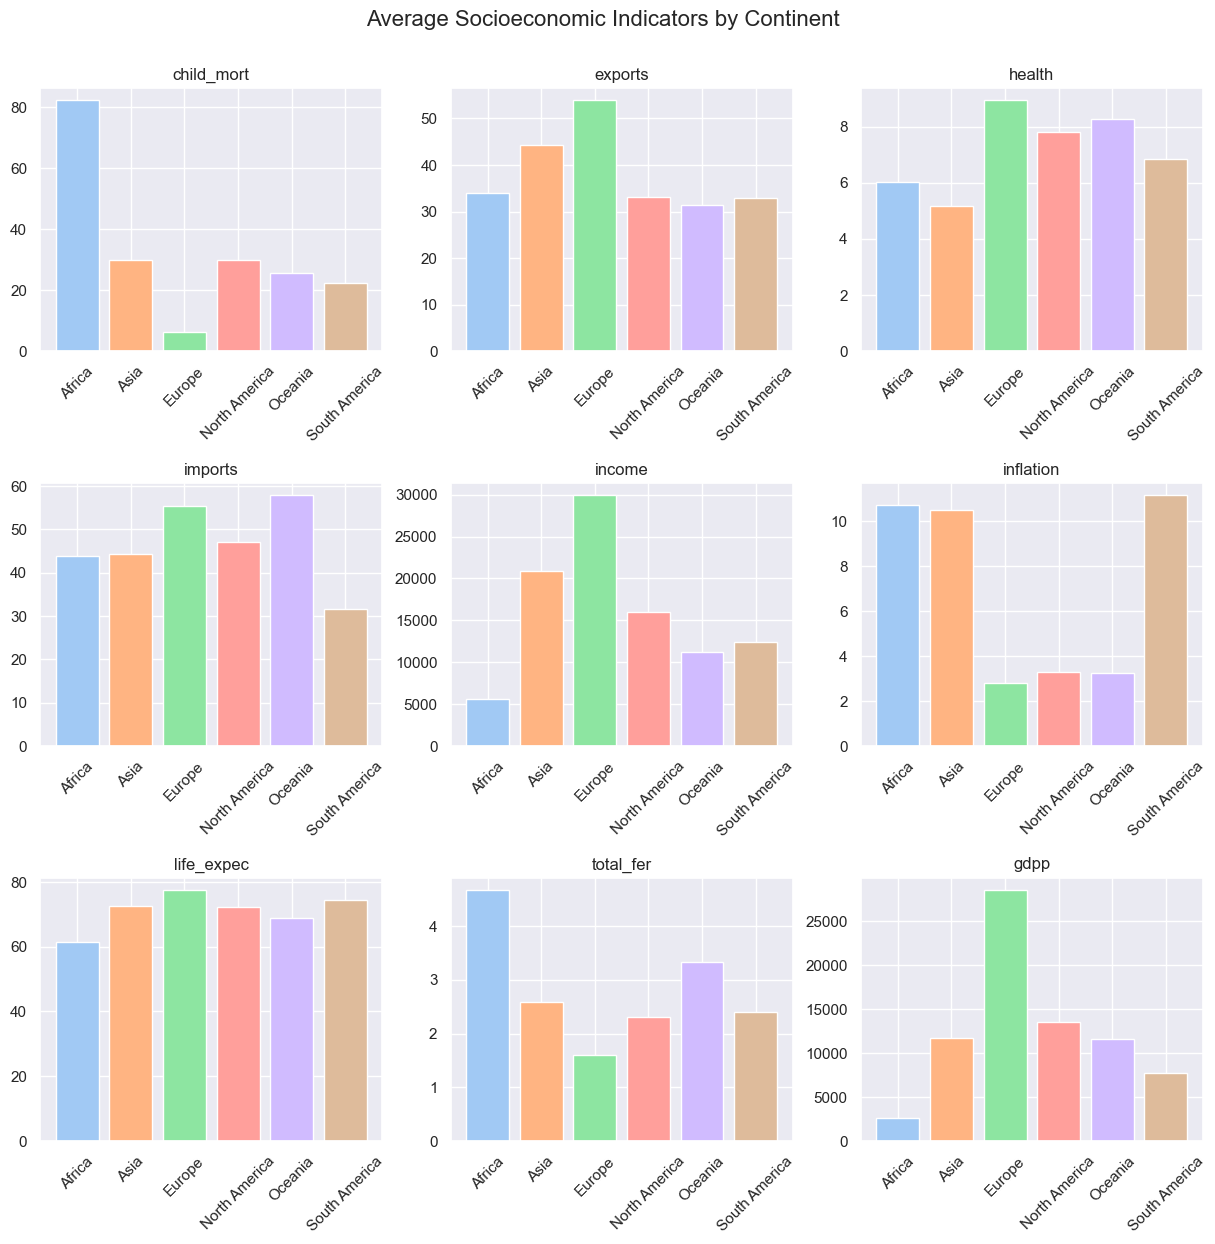

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 13))

for i, column in enumerate(continent_df.columns[1:]):
    ax = axes[i // 3, i % 3]
    bars = ax.bar(continent_df["continent"], continent_df[column], color=colors)
    ax.set_title(column)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis="x", rotation=45)

plt.suptitle("Average Socioeconomic Indicators by Continent", fontsize=16)
plt.subplots_adjust(top=0.92, wspace=0.2, hspace=0.5)

plt.savefig("./result/avg_continent.png", bbox_inches="tight")

In [23]:
df.to_csv("./data/preprocessed_countries.csv", encoding="utf-8")